## TO DO
- [ ] Treinar um modelo, gerar novos dados apenas com volume e vazão diferentes, ver o desempenho
- [ ] Diferentes situações:
    - [ ] reação inversa
    - [ ] adiabática
- [x] Ver quanto tempo demora pra atingir o estado estacionário (provavelmente algumas amostras só)

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
history = History()

2021-09-07 17:31:18.050225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-07 17:31:18.067658: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# data = pd.read_csv('../data/data_Ea83680_k026000000000.0_V0.2.csv', index_col=0)
# data = pd.read_csv('../data/data_Ea83680_k026000000000.0_V0.2_K2.csv', index_col=0)
data = pd.read_csv('../data/data_Ea53000.0_k05000.0_V500_K2.csv', index_col=0)
V = 500

In [4]:
x_cols = ['Cae', 'Cbe', 'T']
y_col = ['Cc']

minmax = MinMaxScaler()
in_data = minmax.fit_transform(data[x_cols].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(in_data, data[y_col].to_numpy(), test_size=.2, )
Y_test = Y_test.reshape(Y_test.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

print(f'x train: {X_train.shape}, x test: {X_test.shape}')
print(f'y train: {Y_train.shape}, y test: {Y_test.shape}')

x train: (800, 3), x test: (200, 3)
y train: (800,), y test: (200,)


In [58]:
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='exponential'))
model.add(Dense(7, activation='sigmoid', ))
model.add(Dense(3, activation='exponential'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=.2, )

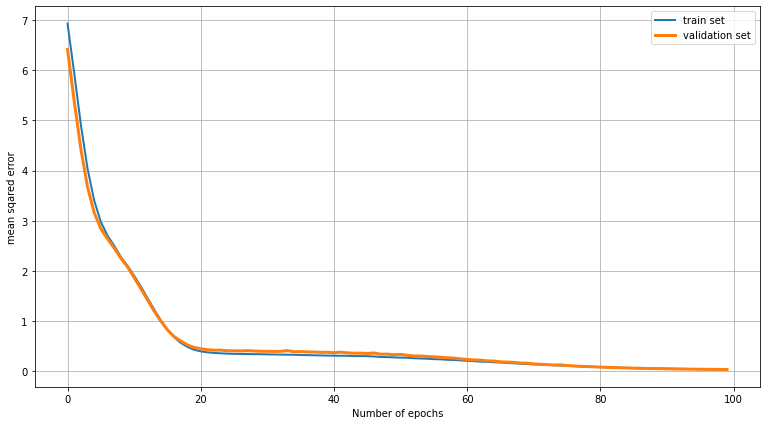

In [59]:
plt.figure(figsize=(13,7))
plt.plot(hist.history['loss'], label='train set', linewidth=2)
plt.plot(hist.history['val_loss'], label='validation set', linewidth=3)
plt.ylabel('mean sqared error')
plt.xlabel('Number of epochs')
plt.legend()
plt.grid()

In [60]:
Y_hat_train = model.predict(X_train)
Y_hat_train = Y_hat_train.reshape(Y_hat_train.shape[0],)
Y_hat_test = model.predict(X_test)
Y_hat_test = Y_hat_test.reshape(Y_hat_test.shape[0],)

In [61]:
mse(Y_train, Y_hat_train), mse(Y_test, Y_hat_test)

(0.04002924719171645, 0.03568556560939237)

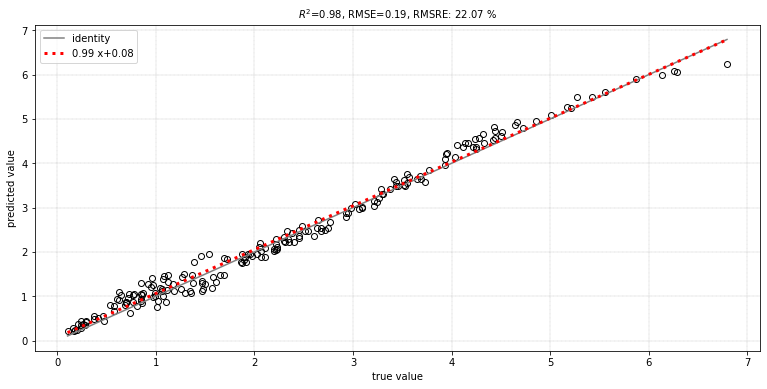

In [62]:
plot_identity_graphic(Y_test, Y_hat_test)

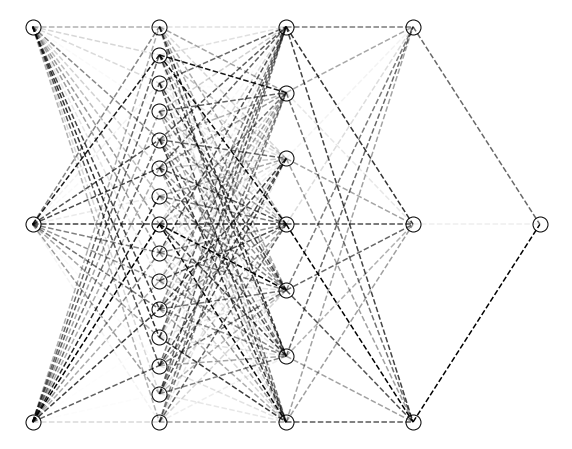

In [63]:
plot_rnn_keras(model)

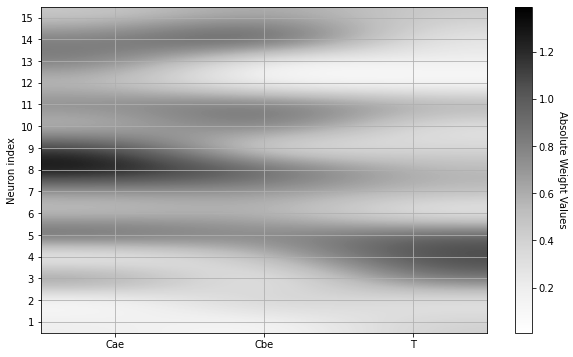

In [65]:
plot_first_layer_keras(model, label=x_cols)